For my  project, I collected the data from Kaggle regarding Airbnb from New York city from the year 2019. An Airbnb is a residential property that hosts rent on a short term basis to travelers. It can be anything from a house, a single room, a boat or even a tree house. Its original name comes from Air Bed and Breakfast. We have heard of it or used the service by now or know someone that has booked or hosted an Airbnb. It is fast becoming the new way to travel and experience the world like never before.My understanding is it in a way similar to Uber.

My dataset consists of all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions. The columns names includes host id, host name, neighborhood group(such as Brooklyn, Manhattan, Queens, neighborhood(city name such as Harlem, Midtown, chelsea), room type(such as Private room, Entire home). The graph conducted was on price, minimum nights, availability and reviews. From the dataset we can information and business ideas from learning about different hosts and areas?, prediction on different variables integrated with each other such as price with location, price with reviews, price with availability and so on.Additionally we can also get other information such as which host was the busiest and its reason. Finally we can also learn the differences between the traffic among different areas and its reasons.


In [83]:
# import required libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter

In [84]:
df = pd.read_csv('AB_NYC_2019.csv')

In [85]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [86]:
# Display the dimensions of the file 
df.shape

(48895, 16)

In [87]:
# Display the first 5 rows of data 
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [88]:
# Display type of variables are in the table 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [89]:
# Generate descriptive statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [90]:
# Generate descriptove statistics. Limit result to strings
df.describe(include = ['O'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


### Data Visualization

In [91]:
# import visulization packages
import matplotlib.pyplot as plt


In [92]:
# set up the figure size
plt.rcParams['figure.figsize'] = (30, 10)


In [102]:
# Specify the features of interest
num_features = ['price', 'calculated_host_listings_count', 'number_of_reviews', 'availability_365']
xaxes = num_features
yaxes = ['Total hosts count', 'Total hosts count', 'Total hosts count', 'Total hosts count']

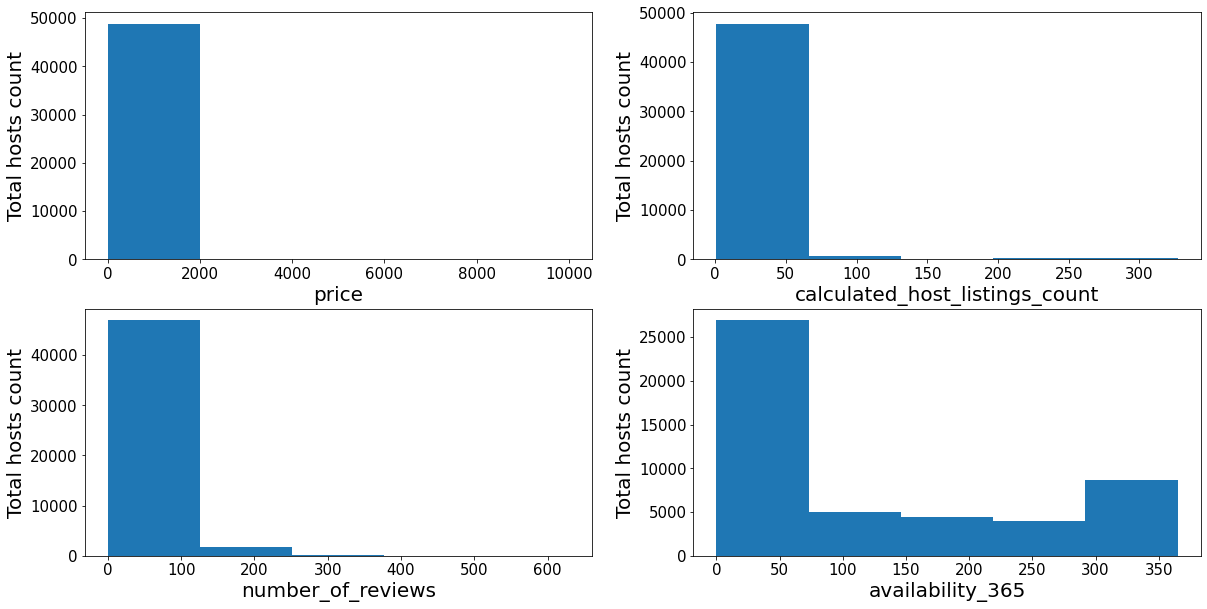

In [106]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=5)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [95]:
# Barcharts: set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)


In [96]:
# make the Embarked data read to feed into the visulizer
X_room = df.groupby('room_type').size().reset_index(name='Counts')['room_type']
Y_room = df.groupby('room_type').size().reset_index(name='Counts')['Counts']

# make the Sex data read to feed into the visulizer
X_neighborhood = df.groupby('neighbourhood_group').size().reset_index(name='Counts')['neighbourhood_group']
Y_neighborhood = df.groupby('neighbourhood_group').size().reset_index(name='Counts')['Counts']

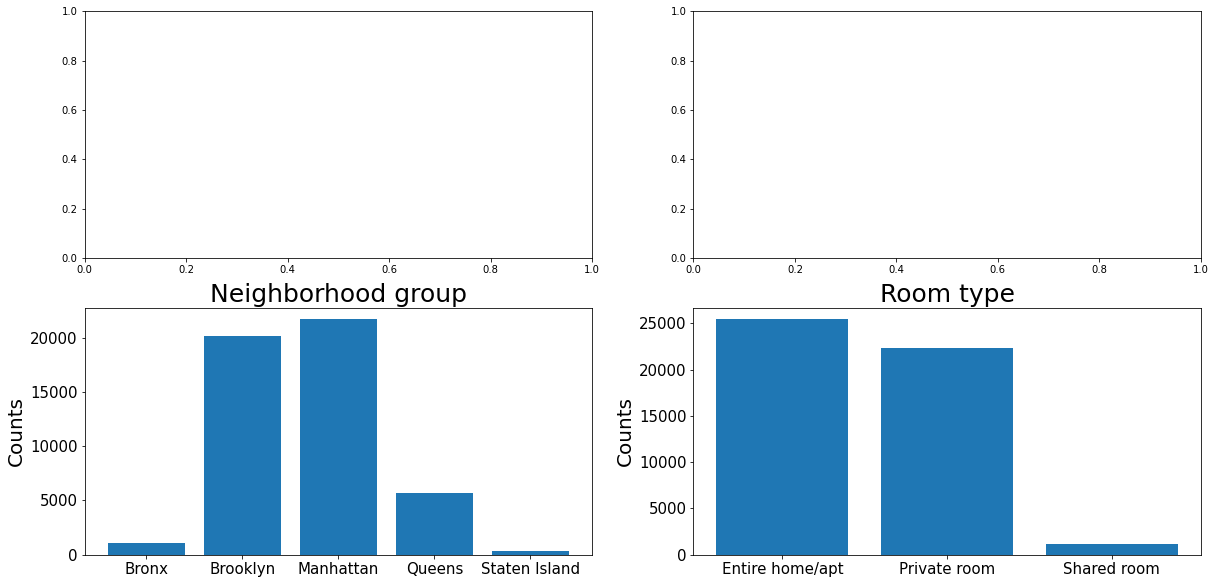

In [97]:
# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the bar plot for - Sex Variable
axes[1, 0].bar(X_neighborhood, Y_neighborhood)
axes[1, 0].set_title('Neighborhood group', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the bar plot for - room type variable
axes[1, 1].bar(X_room, Y_room)
axes[1, 1].set_title('Room type', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show();

Based on above 6 graphs, we can conclude that with host listing of 48895 ,  25k host listed were available in between 0 to 70 days, 40,000 plus had more than 100 reviews, most of the listing were from manhattan followed by brooklyn, queens, bronx and staten island, the price range fell below $2000 and the type of room mostly consisted of entire home or apartment followed by private room and lastly less were shared rooms